In [3]:
# Import required libraries
import os
from pydub import AudioSegment, silence 
import matplotlib.pyplot as plt
import numpy as np
import wave

In [59]:
# shows the sound waves for MONO and 16bit
def visualize(path: str,sil=None):
    raw = wave.open(path)
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, dtype ="int16")
    f_rate = raw.getframerate()
    time = np.linspace( # prepare x-axis plot => https://deepage.net/features/numpy-linspace.html#:~:text=NumPy%E3%81%AE%20np.linspace%20%E3%81%AF,%E3%82%84%E3%81%99%E3%81%8F%E3%82%B9%E3%83%9E%E3%83%BC%E3%83%88%E3%81%AB%E3%81%AA%E3%82%8A%E3%81%BE%E3%81%99%E3%80%82
        0, # start
        len(signal) / f_rate, # total length => end
        num = len(signal)
    )
    plt.figure(1)
    plt.title("Sound Wave")
    plt.xlabel("Time")
    plt.plot(time, signal)
    if sil:
        for i in sil:
            plt.axvline(x=i[0], color='red') 
            plt.axvline(x=i[1], color='yellow')
    plt.show()

-16.926381751727707 0.0
[(0.2, 1.377), (1.678, 1.902), (2.173, 2.649)]
16000 2.944


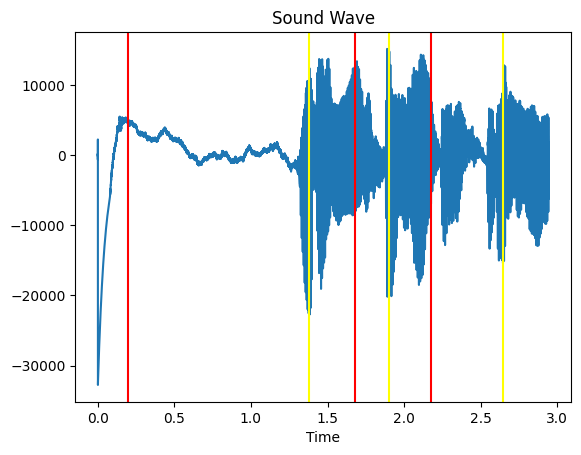

In [96]:
# For mono
# Pass audio path
# file ='../assets/audio01.wav'
# file ='../assets/output.wav'
# file ='../assets/sample.wav'
# file ='../assets/noise.wav'
file ='../assets/output_one_channel.wav'
assert os.path.isfile(file)

myaudio = AudioSegment.from_wav(file)

print(myaudio.dBFS, myaudio.max_dBFS)

silenc = silence.detect_silence(myaudio, min_silence_len=200, silence_thresh=-20)
silenc = [((start/1000),(stop/1000)) for start,stop in silenc]
print(silenc)

visualize(file,silenc)

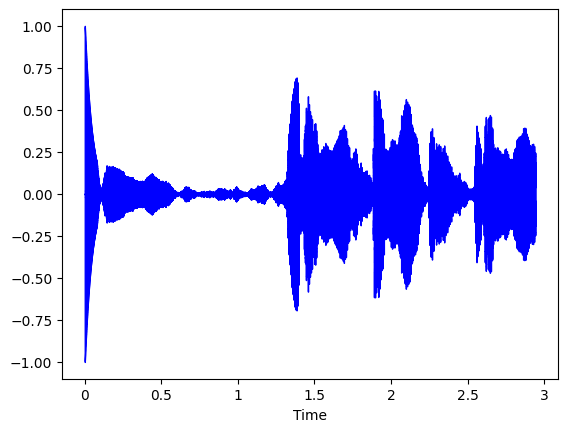

In [111]:
# Waveform by librosa
import librosa
import librosa.display

file ='../assets/output_one_channel.wav'
assert os.path.isfile(file)

wav, sr = librosa.load(file, sr=16000)
# time = np.arange(0,len(wav)) / sr
# print(time)
# plt.plot(time, wav)
librosa.display.waveshow(wav,sr=sr, color='b')

/tmp/ipykernel_174/3748817806.py:18: RuntimeWarning: divide by zero encountered in log10
  y_dBFS = 20 * np.log10(np.abs(y_normalized))


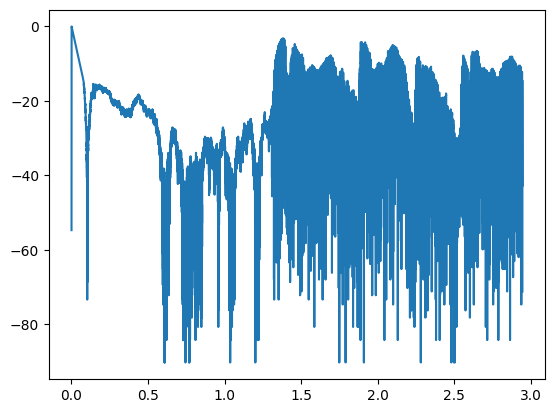

In [113]:
# Waveform by librosa in dBFS
import librosa
import librosa.display

file ='../assets/output_one_channel.wav'
assert os.path.isfile(file)

# 音声ファイルを読み込む
y, sr = librosa.load(file, sr=16000)

# 波形データの絶対値の最大値を取得（正規化のため）
max_abs = np.max(np.abs(y))

# 波形データを正規化（最大振幅が1になるようにスケーリング）
y_normalized = y / max_abs

# 波形データをdBFSに変換
y_dBFS = 20 * np.log10(np.abs(y_normalized))

time = np.arange(0,len(y)) / sr
plt.plot(time, y_dBFS)

[(0.2, 1.377), (1.678, 1.902), (2.173, 2.649)]


/tmp/ipykernel_174/890362078.py:38: RuntimeWarning: divide by zero encountered in log10
  y_dBFS = 20 * np.log10(np.abs(y_normalized))


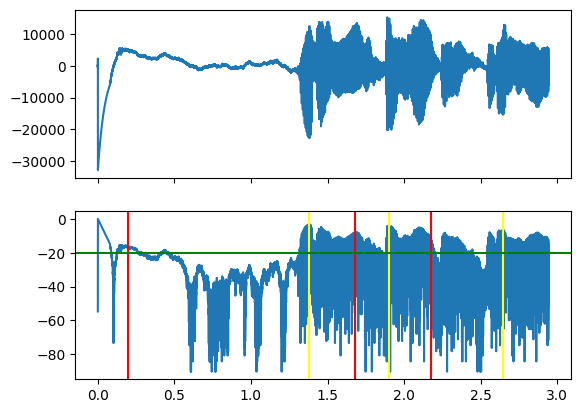

In [128]:
# threshold
silence_thresh = -20

# load audio
file ='../assets/output_one_channel.wav'
assert os.path.isfile(file)
myaudio = AudioSegment.from_wav(file)
y, sr = librosa.load(file, sr=16000)

# detect silent
silenc = silence.detect_silence(myaudio, min_silence_len=200, silence_thresh=silence_thresh)
silenc = [((start/1000),(stop/1000)) for start,stop in silenc]
print(silenc)

# prepaer 2 charts
fig, ax = plt.subplots(nrows=2, sharex=True)

# plot with waveframes
raw = wave.open(file)
signal = raw.readframes(-1)
signal = np.frombuffer(signal, dtype ="int16")
f_rate = raw.getframerate()
time = np.linspace( # prepare x-axis plot => https://deepage.net/features/numpy-linspace.html#:~:text=NumPy%E3%81%AE%20np.linspace%20%E3%81%AF,%E3%82%84%E3%81%99%E3%81%8F%E3%82%B9%E3%83%9E%E3%83%BC%E3%83%88%E3%81%AB%E3%81%AA%E3%82%8A%E3%81%BE%E3%81%99%E3%80%82
    0, # start
    len(signal) / f_rate, # total length => end
    num = len(signal)
)
ax[0].plot(time, signal)

# plot with dBFS
# 波形データの絶対値の最大値を取得（正規化のため）
max_abs = np.max(np.abs(y))

# 波形データを正規化（最大振幅が1になるようにスケーリング）
y_normalized = y / max_abs

# 波形データをdBFSに変換
y_dBFS = 20 * np.log10(np.abs(y_normalized))

ax[1].plot(time, y_dBFS)

# show vertical and horizotial line
if silenc:
    for i in silenc:
        plt.axvline(x=i[0], color='red') 
        plt.axvline(x=i[1], color='yellow')

plt.axhline(y=silence_thresh, color='g', linestyle='-')

plt.show()

[(0.004, 2.76), (6.905, 11.804), (18.48, 21.82), (22.921, 27.522), (28.155, 30.168), (30.289, 43.69), (48.954, 56.671), (57.204, 60.666), (61.841, 63.959), (63.966, 70.578), (70.922, 75.424), (76.069, 96.173), (96.373, 114.918), (115.085, 120.0)]


/tmp/ipykernel_174/27677336.py:39: RuntimeWarning: divide by zero encountered in log10
  y_dBFS = 20 * np.log10(np.abs(y_normalized))


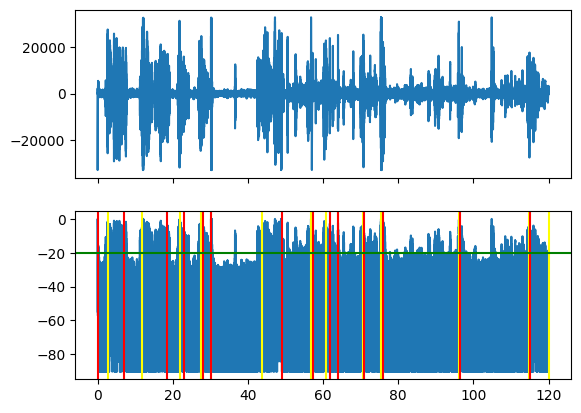

In [130]:
# 120 sec sample audio
# threshold
silence_thresh = -20

# load audio
file ='../assets/202402181903_one_channel_120sec.wav'
assert os.path.isfile(file)
myaudio = AudioSegment.from_wav(file)
y, sr = librosa.load(file, sr=16000)

# detect silent
silenc = silence.detect_silence(myaudio, min_silence_len=2000, silence_thresh=silence_thresh)
silenc = [((start/1000),(stop/1000)) for start,stop in silenc]
print(silenc)

# prepaer 2 charts
fig, ax = plt.subplots(nrows=2, sharex=True)

# plot with waveframes
raw = wave.open(file)
signal = raw.readframes(-1)
signal = np.frombuffer(signal, dtype ="int16")
f_rate = raw.getframerate()
time = np.linspace( # prepare x-axis plot => https://deepage.net/features/numpy-linspace.html#:~:text=NumPy%E3%81%AE%20np.linspace%20%E3%81%AF,%E3%82%84%E3%81%99%E3%81%8F%E3%82%B9%E3%83%9E%E3%83%BC%E3%83%88%E3%81%AB%E3%81%AA%E3%82%8A%E3%81%BE%E3%81%99%E3%80%82
    0, # start
    len(signal) / f_rate, # total length => end
    num = len(signal)
)
ax[0].plot(time, signal)

# plot with dBFS
# 波形データの絶対値の最大値を取得（正規化のため）
max_abs = np.max(np.abs(y))

# 波形データを正規化（最大振幅が1になるようにスケーリング）
y_normalized = y / max_abs

# 波形データをdBFSに変換
y_dBFS = 20 * np.log10(np.abs(y_normalized))

ax[1].plot(time, y_dBFS)

# show vertical and horizotial line
if silenc:
    for i in silenc:
        plt.axvline(x=i[0], color='red') 
        plt.axvline(x=i[1], color='yellow')

plt.axhline(y=silence_thresh, color='g', linestyle='-')

plt.show()

[(0.0, 0.004), (2.76, 6.905), (11.804, 18.48), (21.82, 22.921), (27.522, 28.155), (30.168, 30.289), (43.69, 48.954), (56.671, 57.204), (60.666, 61.841), (63.959, 63.966), (70.578, 70.922), (75.424, 76.069), (96.173, 96.373), (114.918, 115.085)]


/tmp/ipykernel_174/3840316494.py:40: RuntimeWarning: divide by zero encountered in log10
  y_dBFS = 20 * np.log10(np.abs(y_normalized))


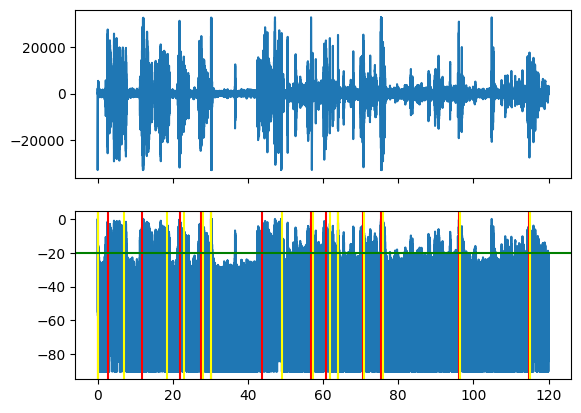

In [134]:
# Slice non-silence part with 120 sec sample audio
# threshold
silence_thresh = -20

# load audio
file ='../assets/202402181903_one_channel_120sec.wav'
assert os.path.isfile(file)
myaudio = AudioSegment.from_wav(file)
y, sr = librosa.load(file, sr=16000)

# detect silent
silenc = silence.detect_nonsilent(myaudio, min_silence_len=2000, silence_thresh=silence_thresh)
tmp = silenc
silenc = [((start/1000),(stop/1000)) for start,stop in silenc]
print(silenc)

# prepaer 2 charts
fig, ax = plt.subplots(nrows=2, sharex=True)

# plot with waveframes
raw = wave.open(file)
signal = raw.readframes(-1)
signal = np.frombuffer(signal, dtype ="int16")
f_rate = raw.getframerate()
time = np.linspace( # prepare x-axis plot => https://deepage.net/features/numpy-linspace.html#:~:text=NumPy%E3%81%AE%20np.linspace%20%E3%81%AF,%E3%82%84%E3%81%99%E3%81%8F%E3%82%B9%E3%83%9E%E3%83%BC%E3%83%88%E3%81%AB%E3%81%AA%E3%82%8A%E3%81%BE%E3%81%99%E3%80%82
    0, # start
    len(signal) / f_rate, # total length => end
    num = len(signal)
)
ax[0].plot(time, signal)

# plot with dBFS
# 波形データの絶対値の最大値を取得（正規化のため）
max_abs = np.max(np.abs(y))

# 波形データを正規化（最大振幅が1になるようにスケーリング）
y_normalized = y / max_abs

# 波形データをdBFSに変換
y_dBFS = 20 * np.log10(np.abs(y_normalized))

ax[1].plot(time, y_dBFS)

# show vertical and horizotial line
if silenc:
    for i in silenc:
        plt.axvline(x=i[0], color='red') 
        plt.axvline(x=i[1], color='yellow')

plt.axhline(y=silence_thresh, color='g', linestyle='-')

plt.show()

if tmp:
    for index, window in enumerate(tmp):
        extract = myaudio[window[0]:window[1]]
        extract.export(f'extract-{index}.wav', format="wav")